K-means clustering by Hossein Basereh Taramsari

## Step 1 2D Data Generalization and Visualization:

### a) Generate a 2D dataset that includes two separate categories of data, each of which contains 100 data points that normally distributed. The two categories have a mean of (1, 1) and (5, 5), respectively. Both categories have a standard deviation of 1.

In [83]:
import numpy as np
import gzip
import struct
from sklearn.cluster import KMeans
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [84]:
# Given parameters
np.random.seed(42)
num_points = 100
mean1 = [1, 1]
mean2 = [5, 5]
std_dev = 1

# Data Generation
category1_data = np.random.normal(mean1, std_dev, size=(num_points, 2))
category2_data = np.random.normal(mean2, std_dev, size=(num_points, 2))

# Combine 
dataset = np.vstack((category1_data, category2_data))

### b) Visualize the data using scatter plot.

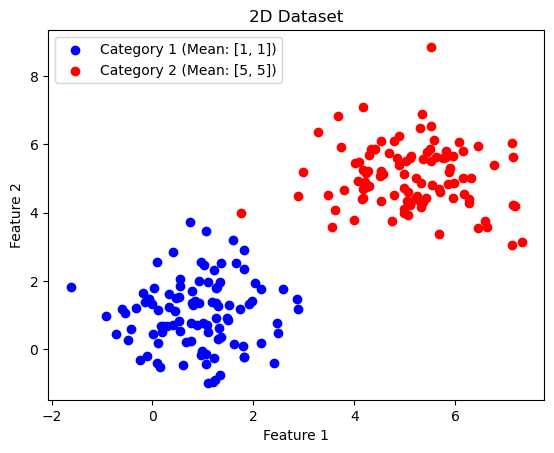

In [85]:
plt.scatter(category1_data[:, 0], category1_data[:, 1], label='Category 1 (Mean: [1, 1])', c='blue')
plt.scatter(category2_data[:, 0], category2_data[:, 1], label='Category 2 (Mean: [5, 5])', c='red')
plt.legend()
plt.title('2D Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Step 2 Helper Function and Initialization

### a) Define a helper function, i.e., the Euclidean distance function.

In [86]:

def euclidean_distance(point1, point2):
    point1 = np.array(point1)
    point2 = np.array(point2)
    distance = np.sqrt(np.sum((point2 - point1)**2))
    return distance


### b) Implement a initialize_centroids function that randomly select K (In this example, K=2) centroids as the initial centroids. Plot the results and use marker in pyplot to highlight the centroids. 

In [87]:
def initialize_centroids(data, k):
    data_copy = data.copy()  
    np.random.shuffle(data_copy)
    return data_copy[:k]

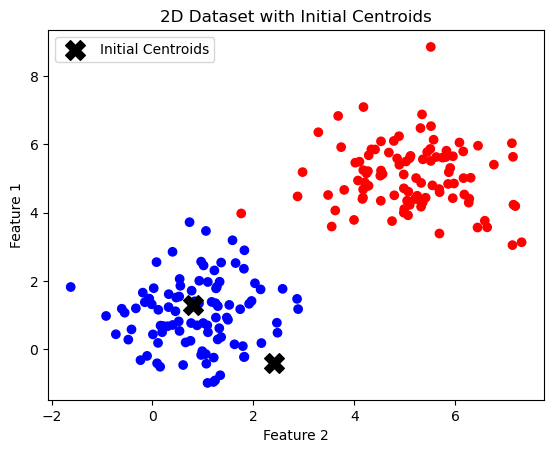

In [88]:
# Number of clusters (centroids)
k = 2

# Initialize centroids
initial_centroids = initialize_centroids(dataset, k)

# Plot
plt.scatter(dataset[:, 0], dataset[:, 1], c=['blue']*num_points + ['red']*num_points)
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], marker='X', s=200, c='black', label='Initial Centroids')
plt.title('2D Dataset with Initial Centroids')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')
plt.legend()
plt.show()


## Step 3 K-means Implementation 

### As shown in the pseudo code, each iteration of K-means algorithm includes two actions: 1) Assign each point to the nearest centroids 2) Update the centroid. To implement K-means, we define two functions assign_cluster and update_centroids corresponding to these two actions.

### a) Implement assign_cluster function. In this function, you need to calculate the distance between the assigned point and the centroids. Then you need to assign the point to the nearest centroid.

In [89]:
def assign_cluster(data, centroids):
    num_points = len(data)
    num_centroids = len(centroids)
    clusters = np.zeros(num_points, dtype=int)
    for i in range(num_points):
        distances = [euclidean_distance(data[i], centroid) for centroid in centroids]
        clusters[i] = np.argmin(distances)
    return clusters

### b) Implement update_centroids function. You need to calculate the mean of all the points assigned to each centroid to determine the new centroids.

In [90]:
def update_centroids(data, clusters, k):
    new_centroids = np.zeros((k, data.shape[1]))
    for cluster in range(k):
        cluster_indices = np.where(clusters == cluster)
        if len(cluster_indices[0]) > 0:
            cluster_mean = np.mean(data[cluster_indices], axis=0)
            new_centroids[cluster] = cluster_mean
    return new_centroids

### c) Implement K-means function. The algorithm converges when all centroids remain unchanged, i.e., all the new centroids = old centroids. You need to use this as the stop criteria.

In [91]:
def k_means(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for iteration in range(max_iterations):
        clusters = assign_cluster(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        if np.array_equal(centroids, new_centroids):
            print(f"Converged after {iteration + 1} iterations.")
            break
        centroids = new_centroids

    return centroids, clusters

### d) Apply the K-means algorithm on the generated data and visualize the result.

Converged after 3 iterations.
Final centroids:
 [[5.16228424 5.05427427]
 [0.89309215 1.06314698]]
Assigned clusters: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


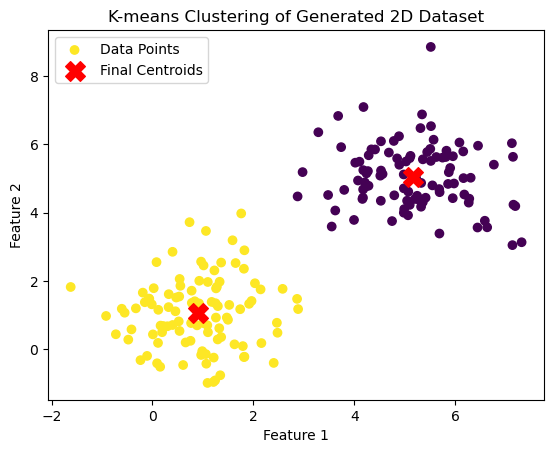

In [92]:
final_centroids, assigned_clusters = k_means(dataset, k)

print("Final centroids:\n", final_centroids)
print("Assigned clusters:", assigned_clusters)

# Plot 
plt.scatter(dataset[:, 0], dataset[:, 1], c=assigned_clusters, cmap='viridis', label='Data Points')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], marker='X', s=200, c='red', label='Final Centroids')
plt.title('K-means Clustering of Generated 2D Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


### Now, you have finished implementing K-means algorithm to achieve clustering with 2D data with 2 centroids. Next, we will use your code to do clustering on 784-dimensional data. The dataset you will use is the MNIST dataset used previously will be implemented here.

In [93]:
def read_idx(filename):
    with gzip.open(filename, "rb") as f:
        zero, data_type, dims = struct.unpack(">HBB", f.read(4))
        shape = tuple(struct.unpack(">I", f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

# Define the file paths for training and testing data
train_images_file = 'train-images-idx3-ubyte.gz'
train_labels_file = 'train-labels-idx1-ubyte.gz'
test_images_file = 't10k-images-idx3-ubyte.gz'
test_labels_file = 't10k-labels-idx1-ubyte.gz'

# Read and print the shapes of the dataset
train_images = read_idx(train_images_file)
train_labels = read_idx(train_labels_file)
test_images = read_idx(test_images_file)
test_labels = read_idx(test_labels_file)

print("Training Images Shape:", train_images.shape)
print("Training Labels Shape:", train_labels.shape)
print("Testing Images Shape:", test_images.shape)
print("Testing Labels Shape:", test_labels.shape)


Training Images Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Testing Images Shape: (10000, 28, 28)
Testing Labels Shape: (10000,)


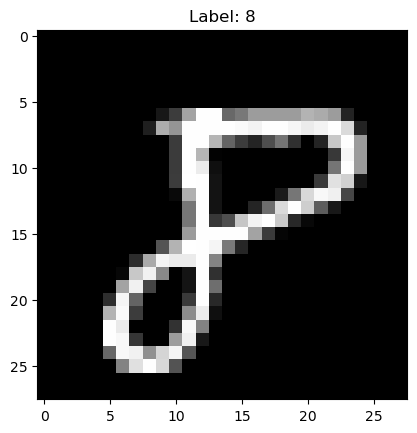

In [94]:
train_images_file = 'train-images-idx3-ubyte.gz'
train_labels_file = 'train-labels-idx1-ubyte.gz'

# Reading
train_images = read_idx(train_images_file)
train_labels = read_idx(train_labels_file)

# Random index
random_index = np.random.randint(0, len(train_images))

# Image and its label
random_image = train_images[random_index]
random_label = train_labels[random_index]

# Display
plt.imshow(random_image, cmap='gray')
plt.title(f"Label: {random_label}")
plt.show()

## Step 4 Train K-means model on MNIST dataset 

### a) Train a K-means model using the training images of MNIST dataset using K = 10. For this step, you can record the time needed for training.
Tips: You can use the functions in packages “datetime” to compute the time difference.

Converged after 83 iterations.
Training time: 0:08:37.958370


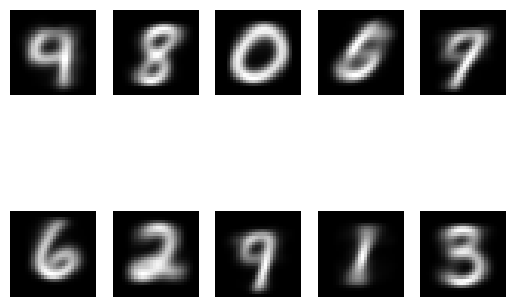

In [68]:
train_images_flatten = train_images.reshape(train_images.shape[0], -1)

k = 10


start_time = datetime.datetime.now()

# Train
final_centroids, assigned_clusters = k_means(train_images_flatten, k)

end_time = datetime.datetime.now()

# Time
training_time = end_time - start_time
print(f"Training time: {training_time}")

# Plot
centroids = final_centroids.reshape(k, 28, 28)
for i in range(k):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centroids[i], cmap='gray')
    plt.axis('off')
plt.show()

## Step 5 Mini-Batch K-means 

### a) Use the train_images to train a mini-batch K-means model. You need to train the model under different cluster numbers: K= [10, 16, 64, 256].

In [95]:
# Mini-Batch 
def mini_batch_k_means(data, k, batch_size=100, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for iteration in range(max_iterations):
        batch_indices = np.random.choice(len(data), size=batch_size, replace=False)
        batch_data = data[batch_indices]
        clusters = assign_cluster(batch_data, centroids)
        new_centroids = update_centroids(batch_data, clusters, k)
        centroids = new_centroids
    return centroids

In [96]:
k_values = [10, 16, 64, 256]

# Training
for k in k_values:
    final_centroids = mini_batch_k_means(train_images_flatten, k)

In [101]:
final_centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### b) To evaluate the model, you need to compare the inertia value of each model to decide which K is better.


In [97]:
from sklearn.cluster import MiniBatchKMeans

# Mini-Batch K-means function
def mini_batch_k_means(data, k, batch_size=100, max_iterations=100):
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, max_iter=max_iterations)
    kmeans.fit(data)
    return kmeans

# List of cluster numbers
k_values = [10, 16, 64, 256]

# Training and evaluation
for k in k_values:
    # Train Mini-Batch K-means model
    kmeans_model = mini_batch_k_means(train_images_flatten, k)
    
    # Evaluate the model using inertia
    inertia_value = kmeans_model.inertia_
    
    print(f"Mini-Batch K-means with K={k} - Inertia: {inertia_value}")

# Optionally, you can use the best K based on the inertia for further analysis.
best_k = min(zip(k_values, [mini_batch_k_means(train_images_flatten, k).inertia_ for k in k_values]), key=lambda x: x[1])[0]
print(f"The best K based on inertia: {best_k}")


Mini-Batch K-means with K=10 - Inertia: 154078662041.57135
Mini-Batch K-means with K=16 - Inertia: 144324998283.82578
Mini-Batch K-means with K=64 - Inertia: 118516774767.39865
Mini-Batch K-means with K=256 - Inertia: 98675280944.8783
The best K based on inertia: 256


### c) Apply the best model with the test dataset and print out the inertia value.

In [98]:
test_images_flatten = test_images.reshape(test_images.shape[0], -1)

# Train the best model with the test dataset
best_k_model = mini_batch_k_means(test_images_flatten, best_k)

# Evaluate the best model using inertia on the test dataset
best_k_inertia = best_k_model.inertia_
print(f"Inertia for the best model with K={best_k} on the test dataset: {best_k_inertia}")


Inertia for the best model with K=256 on the test dataset: 16131120033.937634


In [102]:
from sklearn.metrics import accuracy_score


def assign_labels_to_clusters(clusters, true_labels, k):
    labels = np.zeros_like(clusters)
    for i in range(k):
        mask = (clusters == i)
        labels[mask] = np.bincount(true_labels[mask]).argmax()
    return labels


def manual_accuracy_score(true_labels, predicted_labels):
    correct_predictions = sum(p == t for p, t in zip(predicted_labels, true_labels))
    accuracy = correct_predictions / len(true_labels)
    return accuracy


k_values = [10, 16, 64, 256]

# Training
for k in k_values:
    kmeans_model = mini_batch_k_means(train_images_flatten, k)
    assigned_labels = assign_labels_to_clusters(kmeans_model.predict(train_images_flatten), train_labels, k)
    accuracy = manual_accuracy_score(train_labels, assigned_labels)
    print(f"Mini-Batch K-means with K={k} - Accuracy: {accuracy}")



Mini-Batch K-means with K=10 - Accuracy: 0.5239833333333334
Mini-Batch K-means with K=16 - Accuracy: 0.6388333333333334
Mini-Batch K-means with K=64 - Accuracy: 0.8030833333333334
Mini-Batch K-means with K=256 - Accuracy: 0.8871


In [103]:
# K based on accuracy
best_k_accuracy = max(zip(k_values, [manual_accuracy_score(train_labels, assign_labels_to_clusters(mini_batch_k_means(train_images_flatten, k).predict(train_images_flatten), train_labels, k)) for k in k_values]), key=lambda x: x[1])[0]
print(f"The best K based on accuracy: {best_k_accuracy}")


The best K based on accuracy: 256
